# The Global State of Human Trafficking

In [3]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

CODE to create database and table within the database.

In [4]:
con = sqlite3.connect("GlobalDatasetSept2018.db")
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS victims_table (gender STR, majorityEntry STR, majorityStatusAtExploit STR, ageBroad STR, citizenship STR, yearOfRegistration STR, Datasource STR, CountryOfExploitation STR, typeOfExploitConcatenated STR, RecruiterRelationship STR)")

CODE to transfer columns of data to new database.

In [5]:
with open('Global_Dataset_3_Sept_2018.csv','r') as victims:
    dr = csv.DictReader(victims)
    to_db = [(i['gender'],
              i['majorityEntry'],
              i['majorityStatusAtExploit'],
              i['ageBroad'],
              i['citizenship'],
              i['yearOfRegistration'],
              i['Datasource'],
              i['CountryOfExploitation'],
              i['typeOfExploitConcatenated'],
              i['RecruiterRelationship']) for i in dr]
    cur.executemany(
        "INSERT INTO victims_table VALUES "
        "(?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)    
    con.commit()

CODE to retrieve data from SQL database into a python object.

In [6]:
df = pd.read_sql("SELECT * FROM victims_table", con)

CODE to replace missing values ("-99") with NaN.

In [7]:
df.replace(-99, np.nan, regex=True, inplace=True)

CODE to rename columns in SQL database.

In [8]:
df.rename(
    columns={
        'Gender':'Gender',
        'majorityEntry': 'Entry Age',
        'majorityStatusAtExploit': 'Exploitation Age',
        'ageBroad': 'Assistance Age', 
        'citizenship': 'Country Origin', 
        'yearOfRegistration': 'Year Registration', 
        'Datasource': 'Contact Method', 
        'CountryOfExploitation': 'Country Exploitation',
        'typeOfExploitConcatenated': 'Exploitation Type',
        'recruitment_relation': 'Recruiter Relation'
    }, 
    inplace=True)

In [32]:
df

,Gender,Entry Age,Exploitation Age,Assistance Age,Country Origin,Year Registration,Contact Method,Country Exploitation,Exploitation Type,Recruiter Relation
0,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
1,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
2,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
3,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
4,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
5,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
6,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
7,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
8,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None
9,NaN,NaN,NaN,NaN,NaN,2002,Case Management,NaN,NaN,None


# A GLOBAL PERSPECTIVE

### Year of Regristration Plot

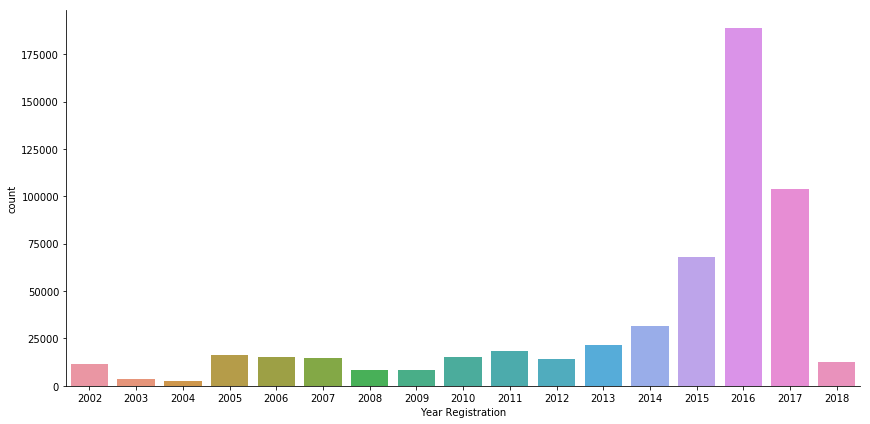

In [11]:
sns.catplot(
    x="Year Registration",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

The year in which the individual was registered and assisted by IOM or the year in which Polaris first received a report of the individual’s trafficking situation, or the date of entry into Liberty Asia’s VCMS.

This chart reflects the overall trend of reporting over the past 16 years (note this is NOT reflecting the total amount of people trafficked, just the ones agencies know about). The catplot shows how few human trafficking reports their were from 2002 to 2014. This could be due to a number a factors including limited reporting resources and decreased awareness. The amount of reports significantly increased between 2015 and 2017. The numbers in 2018 are inconclusive being that the report was generated in September of 2018 and even the dataset representing only a fraction of the year of 2018.

### Initial Contact Method Between Victim and Agency Plot

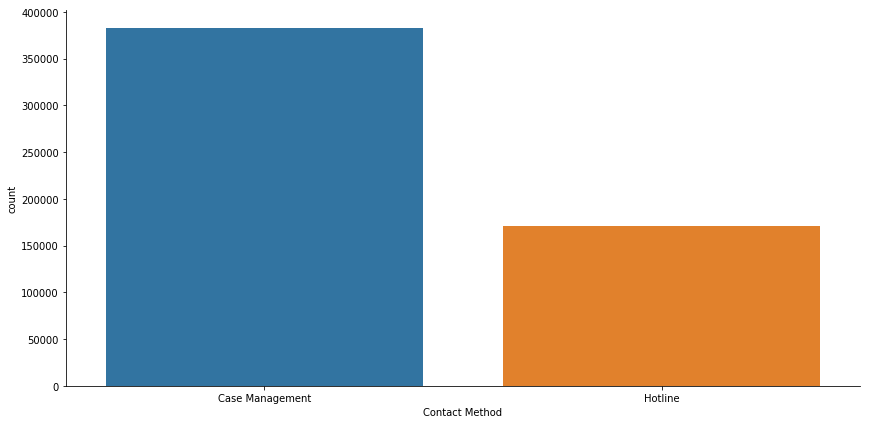

In [12]:
sns.catplot(
    x="Contact Method",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

Data collection method, which generally reflects the services provided to victims.

- Case management: Individual recieved social services from an agency in person.
- Hotline: Individual received services, was referred to services, or was reported to a helpline through a remote means of communication such as a phone call, text message, online form report, or email.

# WHO ARE THEY?

### Gender of Victims Plot

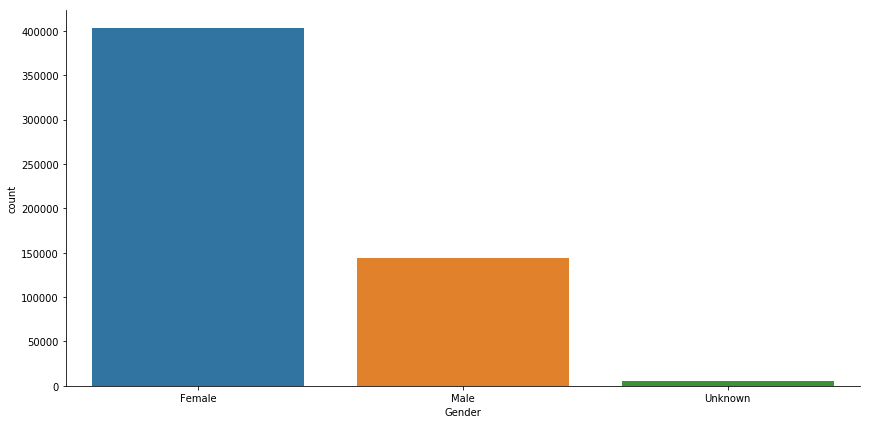

In [13]:
sns.catplot(
    x="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

Designates the individual's expression or condition of being male, female, both or neither. This category considers the psychological, behavioral, social, and cultural aspects of being male, female, or non-binary (masculinity, femininity, neither, or a combination of both).

This goes without saying, but though males are, indeed, victims of human trafficking, females victims almost triple the amount of males victims among people being trafficked.

### Age of Assistance Plot

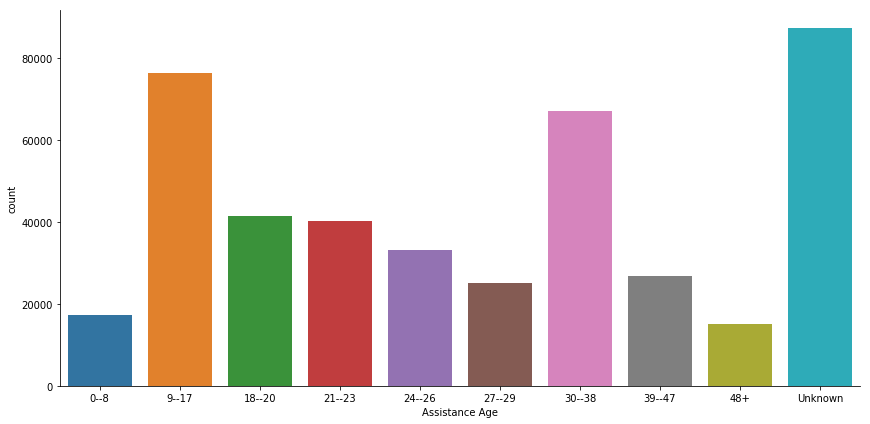

In [14]:
sns.catplot(
    x="Assistance Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+', 'Unknown'),
)

The chart shows the individual's age at the time the individual was registered and assisted by IOM, or Polaris first received a report of the individual’s trafficking situation, or at first point of contact with Liberty Asia’s NGO partner. Note that this is not the age in which someone was first exploited, which means by the time a case is a reported (reflected above in terms of the victims age) the victim could have already been exploited for a period of time (e.g. months, years, etc.).

### Age of Assistance per Gender Plot

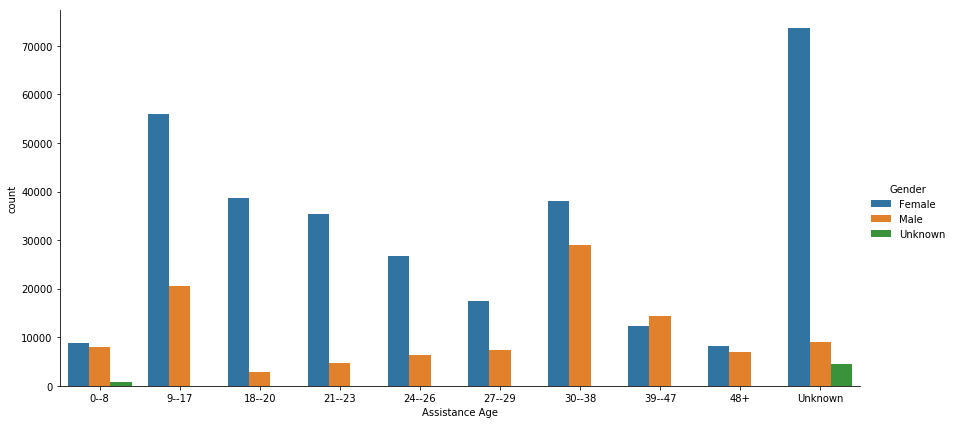

In [25]:
sns.catplot(
    x="Assistance Age",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=2,
    order= ('0--8', '9--17', '18--20', '21--23', '24--26', '27--29', '30--38', '39--47', '48+', 'Unknown'),
)

This chart is telling because it shows that the ratio between men and women victims when they are first reported a victim of trafficking is closer to 50% in groups 0-8, 30-38, 39-47, and 48+. But among the ages 9-29 there is a significant more amount of women than men that are being reported victims of human trafficking.

### Age of Exploitation Plot

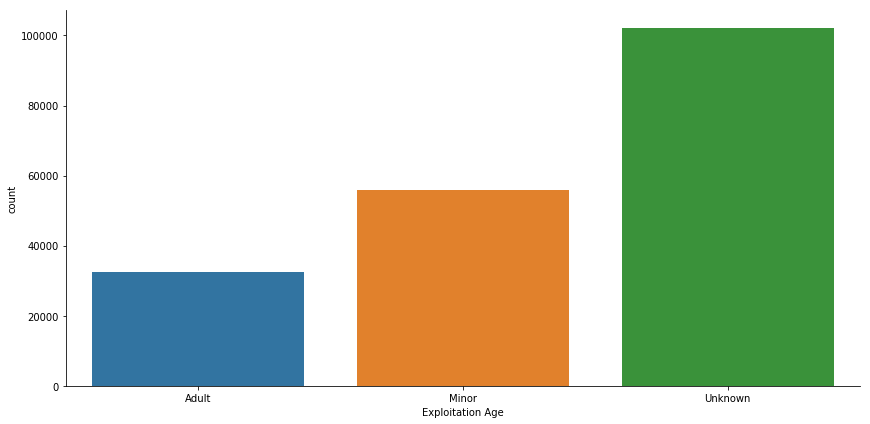

In [15]:
sns.catplot(
    x="Exploitation Age",
    data=df,
    kind="count",
    height=6,
    aspect=2,
)

The individual's age at the time the exploitation of the individual began. Exploitation includes the exploitation of the prostitution of others or other forms of sexual exploitation, forced labour or services, slavery or practices similar to slavery, servitude or the removal of organs. Among known categories, the exploitation age of victims below 18 years of age almost doubles victims that began being exploited at the age of 18+.

### Country of Origin Plot

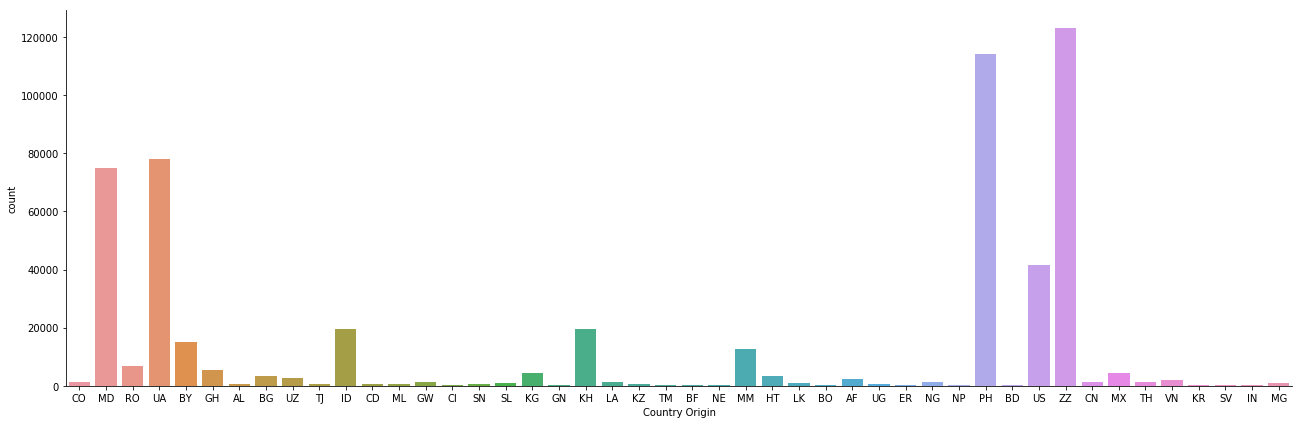

In [16]:
sns.catplot(
    x="Country Origin",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

The set of rights and duties that a person has with a country because of his/her legal bond with the country. This term is often used interchangeably with nationality, however some states distinguish between nationality and citizenship and provide for different types of nationality of which citizenship is one form. Liberty Asia partners recording this as ‘Country of Origin’ as a proxy for citizenship due to this not being recorded. 

In short, this is WHERE the victims of human trafficking in this report came from.

- Values based on ISO 3166-1 Alpha-2 Codes

Country Values Worth Mentioned:
- ZZ = Unknown Country
- PH = Philippines
- UA = Ukraine
- MD = Moldova
- US = United States
- KH = Cambodia
- ID = Indonesia
- BY = Belarus
- MM = Myanmar

### Country of Exploitation Plot

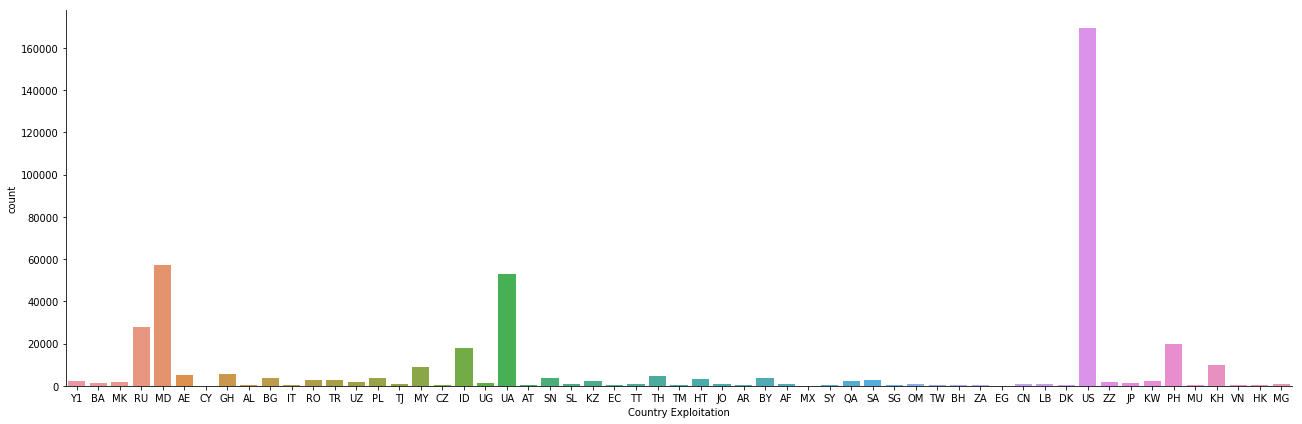

In [17]:
sns.catplot(
    x="Country Exploitation",
    data=df,
    kind="count",
    height=6,
    aspect=3,
)

Indicates the last country where the victim was exploited. In the context of human trafficking data, this is also referred to as the “country of destination” (as opposed to “country of origin” if human trafficking was across borders). In instances where are no data for the last country of exploitation, a proxy has been created to capture as much data as possible about the country the victim was exploited in. The proxy uses data about the country in which the victim is first supported/assisted, identified and/or referred, which in the vast majority of cases is de facto the last country of exploitation. 

In short, this is WHERE victims of human trafficking are going.

- Values based on ISO 3166-1 Alpha-2 Codes

Country Values Worth Mentioned:
1) US = United States
2) MD = Moldova
3) UA = Ukraine
4) RU = Russia
5) PH = Philippines
6) ID = Indonesia
7) KH = Cambodia

# WHY ARE THEY BEING TRAFFICKED?

### Exploitation Type Plot

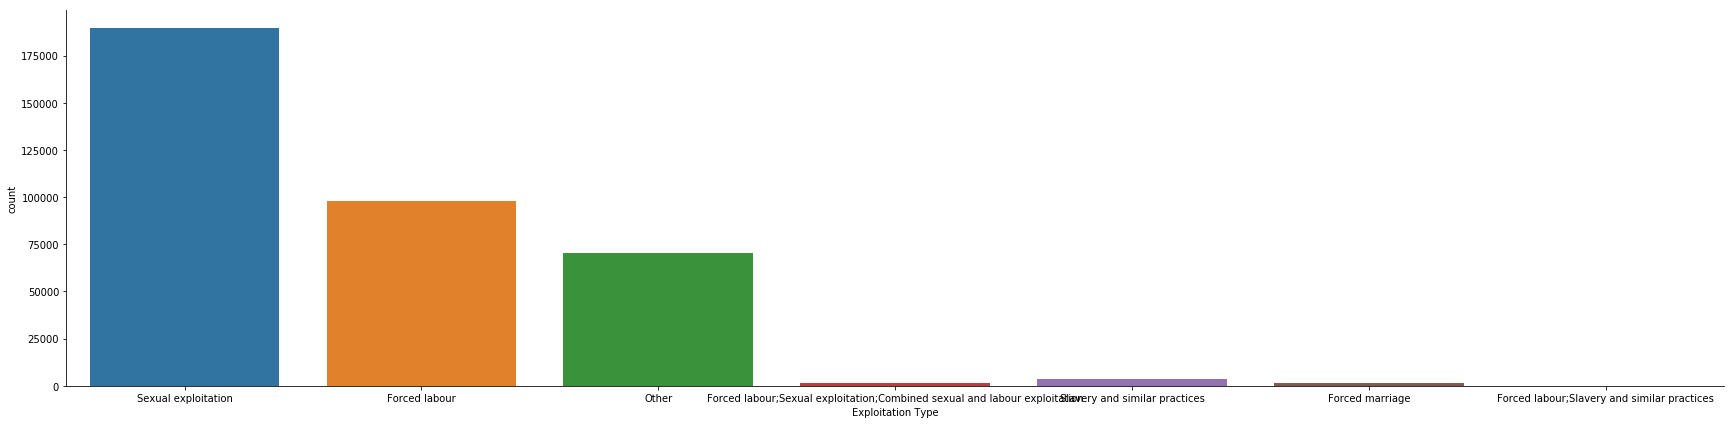

In [18]:
sns.catplot(
    x="Exploitation Type",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

^^Comment

### Exploitation Type per Gender Plot

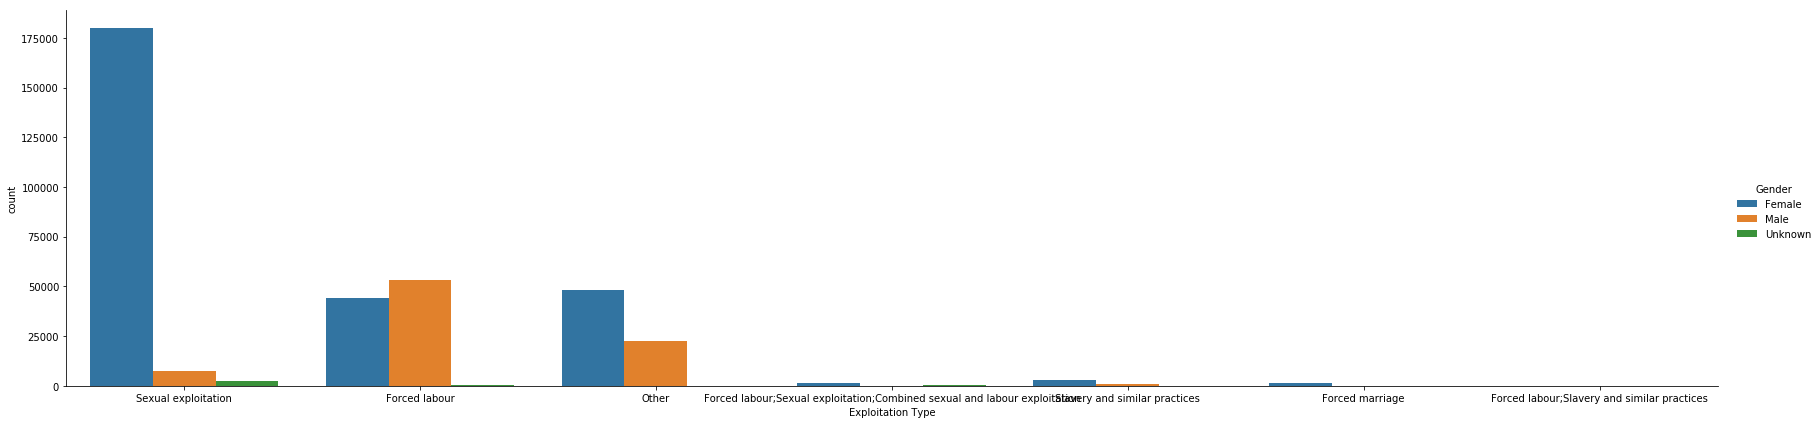

In [22]:
sns.catplot(
    x="Exploitation Type",
    hue="Gender",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

As you can see in the above chart, among all the victims, sexual eploitation deals almost exclusively with females, where forced labor has a male majority, but is still close to 50%.

# WHOSE TRAFFICKING THEM?

### Recruiter Relationship Plot

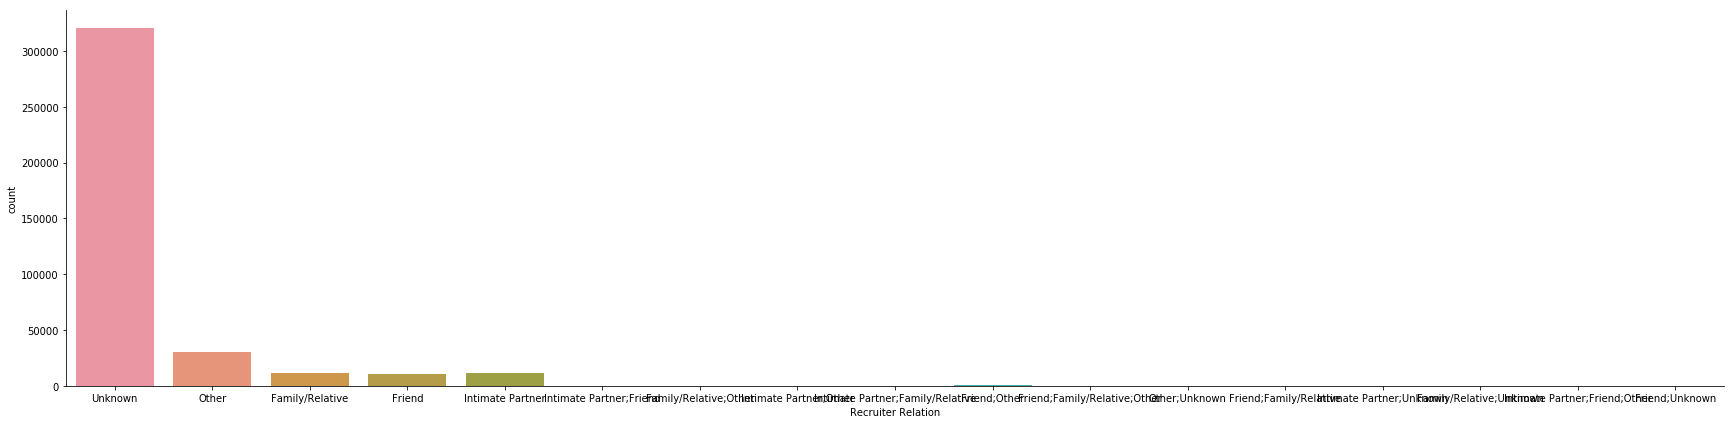

In [33]:
sns.catplot(
    x="Recruiter Relation",
    data=df,
    kind="count",
    height=6,
    aspect=4,
)

Indicates whether a person who initially enticed or obtained the individual into the
situation of exploitation was one with whom the individual has identified having a current or former romantic relationship.

As is evident, little information is known about this. Victims often have a hard time remember

^^Comment